# 聚类和分类

In [3]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader,TensorDataset
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

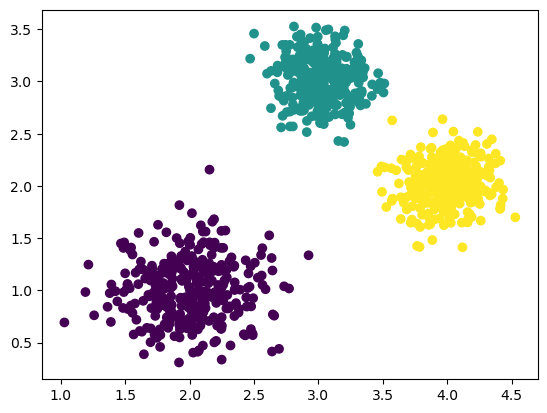

In [40]:
data,target = make_blobs(n_samples=1000, n_features=2, centers=[[2,1],[3,3],[4,2]],cluster_std=[0.3,0.2,0.2],random_state=42)
plt.scatter(data[:,0],data[:,1],c=target,marker="o")
plt.show()

In [41]:
data.shape

(1000, 2)

In [42]:
target.shape

(1000,)

In [43]:
# 数据准备

data=torch.from_numpy(data)
data=data.type(torch.FloatTensor)
target=torch.from_numpy(target)
target=target.type(torch.LongTensor)
train_x=data[:900]
train_y=target[:900]
test_x=data[900:]
test_y=target[900:]

train_dataset=TensorDataset(train_x, train_y)
test_dataset=TensorDataset(test_x,test_y)
train_loader=DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader=DataLoader(dataset=test_dataset, batch_size=16, shuffle=True)

In [44]:
# 构建网络

class model(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.hidden1=nn.Linear(2,5)
        self.out=nn.Linear(5,3)
        
    def forward(self,x):
        x=self.hidden1(x)
        x=F.relu(x)
        x=self.out(x)
        return x

In [45]:
net=model()
loss_fn=nn.CrossEntropyLoss()
opt=torch.optim.Adam(net.parameters(),lr=0.01)

In [46]:
# 训练

epochs=1000
for e in range(epochs):
    for i,data in enumerate(train_loader):
        x,y=data
        pred=net(x)
        loss=loss_fn(pred,y)
        
        opt.zero_grad()
        loss.backward()
        opt.step()
    if (e%100==0):
        print(loss)

tensor(0.7119, grad_fn=<NllLossBackward0>)
tensor(7.7005e-05, grad_fn=<NllLossBackward0>)
tensor(0.0070, grad_fn=<NllLossBackward0>)
tensor(1.0073e-05, grad_fn=<NllLossBackward0>)
tensor(0., grad_fn=<NllLossBackward0>)
tensor(5.6624e-06, grad_fn=<NllLossBackward0>)
tensor(0., grad_fn=<NllLossBackward0>)
tensor(9.8347e-06, grad_fn=<NllLossBackward0>)
tensor(4.8279e-06, grad_fn=<NllLossBackward0>)
tensor(4.3809e-06, grad_fn=<NllLossBackward0>)


In [47]:
# 预测

rights=0
length=0

def rightness(pred, labels):
    pred = torch.max(pred.data, 1)[1]
    rights = pred.eq(labels.data.view_as(pred)).sum()
    return rights,len(labels)

for i,data in enumerate(test_loader):
    x,y=data
    pred=net(x)
    rights=rights+rightness(pred,y)[0]
    length=length+rightness(pred,y)[1]
    print(y)
    print(torch.max(pred.data,1)[1],"\n")
    
print(rights, length, rights/length)

tensor([1, 1, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 1, 1])
tensor([1, 1, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 1, 1]) 

tensor([1, 2, 0, 1, 2, 2, 2, 1, 1, 2, 0, 0, 0, 2, 2, 2])
tensor([1, 2, 0, 1, 2, 2, 2, 1, 1, 2, 0, 0, 0, 2, 2, 2]) 

tensor([0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 2, 2, 1, 1, 0, 0])
tensor([0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 2, 2, 1, 1, 0, 0]) 

tensor([2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0])
tensor([2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0]) 

tensor([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 2, 1, 1, 0, 0])
tensor([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 2, 1, 1, 0, 0]) 

tensor([2, 2, 0, 2, 2, 1, 1, 0, 1, 2, 1, 1, 2, 2, 0, 0])
tensor([2, 2, 0, 2, 2, 1, 1, 0, 1, 2, 1, 1, 2, 2, 0, 0]) 

tensor([2, 1, 0, 2])
tensor([2, 1, 0, 2]) 

tensor(100) 100 tensor(1.)


# 鸢尾花分类

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
from torch.utils.data import Dataset,DataLoader,TensorDataset
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### 数据预处理

In [15]:
data = pd.read_csv("./dataset/iris.csv")

In [16]:
data.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [18]:
data.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [19]:
data["Species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [20]:
# 去掉Unnamed一列
# 将类别替换为0/1/2

data = data.drop("Unnamed: 0", axis=1)
for i in range(data.shape[0]):
    if data.loc[i,"Species"]=="setosa":
        data.loc[i,"Species"]=0
    elif data.loc[i,"Species"]=="versicolor":
        data.loc[i,"Species"]=1
    else:
        data.loc[i,"Species"]=2

In [21]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
data["Species"].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [23]:
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
Y = data["Species"]
X = data.drop("Species", axis=1)
X.shape, Y.shape

((150, 4), (150,))

In [25]:
# 切分数据集
# 8:2

X_train,X_test, y_train, y_test =train_test_split(X,Y,test_size=0.2, random_state=33)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [26]:
X_train.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'], dtype='object')

In [27]:
X_train.mean(axis=0)

Sepal.Length    5.808333
Sepal.Width     3.052500
Petal.Length    3.665000
Petal.Width     1.160000
dtype: float64

In [28]:
# 均是连续数据，对数据做归一化
# 先对训练集数据做归一化，但要记录mean和std，再对测试集做相同的缩放

col = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

train_mean=X_train.mean(axis=0)
train_std=X_train.std(axis=0)

for i in col:
    mean, std = X_train[i].mean(), X_train[i].std()
    X_train[i] = (X_train[i]-mean)/std

In [29]:
print(train_mean)
print(train_std)

Sepal.Length    5.808333
Sepal.Width     3.052500
Petal.Length    3.665000
Petal.Width     1.160000
dtype: float64
Sepal.Length    0.849378
Sepal.Width     0.464534
Petal.Length    1.781400
Petal.Width     0.753747
dtype: float64


In [30]:
X_train.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
94,-0.245278,-0.758825,0.300326,0.185739
86,1.049788,0.102253,0.581004,0.451080
121,-0.245278,-0.543555,0.693275,1.114432
115,0.696588,0.317522,0.917817,1.512444
140,1.049788,0.102253,1.086224,1.645114


In [31]:
X_train.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,1.200000e+02,1.200000e+02,120.000000,1.200000e+02
mean,-2.923587e-16,-4.773959e-16,0.000000,9.621933e-17
std,1.000000e+00,1.000000e+00,1.000000,1.000000e+00
min,-1.775810e+00,-2.265711e+00,-1.496014,-1.406308e+00
25%,-8.339438e-01,-7.588247e-01,-1.215336,-1.140966e+00
50%,-1.275443e-01,-1.130164e-01,0.272258,1.857387e-01
75%,6.965884e-01,7.480612e-01,0.805546,8.490913e-01
max,2.462587e+00,2.900755e+00,1.815987,1.777785e+00


In [32]:
# 对测试集做相同的缩放
for i in col:
    X_test[i] = (X_test[i]-train_mean[i])/train_std[i]

In [33]:
X_test.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,30.000000,30.000000,30.000000,30.000000
mean,0.206033,0.052023,0.261031,0.260919
std,0.862993,0.646262,0.941079,1.046207
min,-1.658077,-1.835172,-1.327607,-1.406308
25%,-0.127544,-0.274468,-0.696082,-0.809290
50%,0.343389,-0.005382,0.581004,0.384745
75%,0.784888,0.317522,0.987987,0.849091
max,1.638454,1.609139,1.310767,1.777785


### 构造数据集

In [34]:
X_train = X_train.values
X_train = torch.from_numpy(X_train).type(torch.FloatTensor)
y_train = y_train.values.astype(int)
y_train = torch.from_numpy(y_train).type(torch.LongTensor)

X_test = X_test.values
X_test = torch.from_numpy(X_test).type(torch.FloatTensor)
y_test = y_test.values.astype(int)
y_test = torch.from_numpy(y_test).type(torch.LongTensor)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=8, shuffle=True)

### 构建网络

In [35]:
class model(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(4,5)
        self.out = nn.Linear(5,3)
        
    def forward(self, x):
        x = self.hidden1(x)
        x = F.relu(x)
        x = self.out(x)
        return x

In [36]:
net = model()
print(net)

loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.Adam(net.parameters(),lr=0.01)

model(
  (hidden1): Linear(in_features=4, out_features=5, bias=True)
  (out): Linear(in_features=5, out_features=3, bias=True)
)


### 开始训练

In [37]:
epoch_num=200
losses=[]

for e in range(epoch_num):
    
    batch_loss = []
    for i,data in enumerate(train_loader):
        
        x,y=data
        pred = net(x)
        loss = loss_fn(pred, y)
        
        opt.zero_grad()
        loss.backward()
        opt.step()
        batch_loss.append(loss.data.numpy())
        
    if(e%10==0):
        print(e, np.mean(batch_loss))
        losses.append(np.mean(batch_loss))

0 1.061158
10 0.51791656
20 0.28704846
30 0.18326165
40 0.11745381
50 0.0970079
60 0.07932861
70 0.07368823
80 0.06541869
90 0.061408915
100 0.063379556
110 0.05572316
120 0.058850124
130 0.055720508
140 0.050940424
150 0.049220636
160 0.05534596
170 0.048139874
180 0.05077669
190 0.045344263


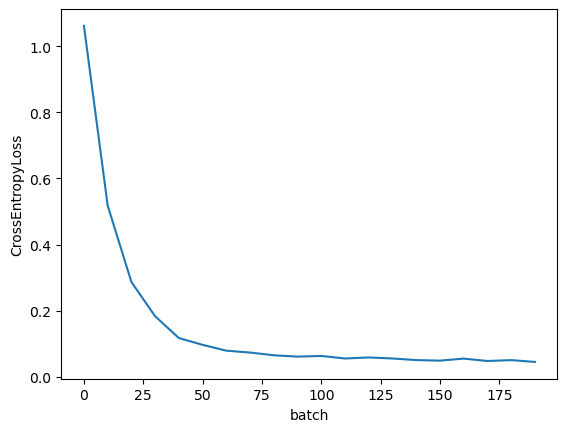

In [38]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(losses))*10, losses)
plt.xlabel("batch")
plt.ylabel("CrossEntropyLoss")
plt.show()

### 测试

In [39]:
rights=0
length=0

def rightness(pred, labels):
    pred = torch.max(pred.data, 1)[1]
    rights = pred.eq(labels.data.view_as(pred)).sum()
    return rights,len(labels)

for i,data in enumerate(test_loader):
    x,y = data
    pred = net(x)
    rights += rightness(pred,y)[0]
    length += rightness(pred,y)[1]
    
print(rights, length, rights/length)

tensor(30) 30 tensor(1.)
